# Encontrando APIs ocultas

Cuando una compañia desarrolla un sitio web muchas veces separa lo que se dice el _frontend_, que es la parte visible del sitio y la cual se ejecuta en tu navegador, del _backend_, la parte del sitio que realiza el computo mas pesado y se ejecuta en servidores/computadoras de la compañia.

Para comunicar el _backend_ con el _frontend_ una forma popular es desarrollar REST APIs, a veces estas son públicas pero a veces están ocultas y las utilizamos sin darnos cuenta cuando interactuamos con un sitio web.

Ejemplo de un sitio web y su API: http://numbersapi.com/

Hoy veremos como encontrarlas y utilizarlas para extraer datos de forma cómoda

## Ejemplo 1: Scrapeando un sitio de finanzas

Para este primer ejemplo veremos como encontrar [esta API]( https://www.bloomberg.com/markets2/api/history/BDIY%3AIND/PX_LAST?timeframe=5_YEAR&period=monthly&volumePeriod=monthly) en [este](https://www.bloomberg.com/quote/BDIY:IND) sitio web.

Luego veremos como utilizarla de 3 maneras:
1. Desde el navegador
2. Con cURL (Un programa de linea de comandos para transferir datos de internet)
3. Con python

### Método utilizando python
1. Entramos al sitio: https://www.bloomberg.com/quote/BDIY:IND
2. Vamos a _Inspeccionar_ ( ctrl+shift+i )
3. Vamos a la solapa _Network_ y seleccionamos XHR (El tipo de paquete que utilizan las APIs)
4. Recargamos el sitio y nos ponemos a revisar el _Response_ de cada paquete hasta encontrar cual contiene la información que buscamos
5. Copiamos el comando cURL necesario para consultarla
![](https://curl.trillworks.com/images/screenshot.png)
6. Utilizamos [curl.trillworks.com](curl.trillworks.com) para armar el request con código python y queda algo así

In [ ]:
import requests

headers = {
    'authority': 'www.bloomberg.com',
    # user-agent: Datos del navegador que estoy usando
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36',
    'dnt': '1',
    # accept: Indica el tipo de datos que esperamos
    # en este caso el "*" indica que puede ser cualquier cosa
    # pero a veces puede ser text/html o image/png por ejemplo
    'accept': '*/*',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'cors',
    'sec-fetch-dest': 'empty',
    'referer': 'https://www.bloomberg.com/quote/BDIY:IND',
    'accept-language': 'es-US,es;q=0.9,en-US;q=0.8,en;q=0.7,es-419;q=0.6,ja;q=0.5',
    # cookie: Información sobre mi actividad en el sitio (Por ejemplo si inicie sesión previamente o no)
    'cookie': '_gcl_au=1.1.1627487790.1596132516; bdfpc=004.9046170925.1596132515875; agent_id=acb7a978-f3aa-4323-9d96-b1537ca8ea3b; session_id=ed2c986c-8c01-4e8c-8b76-fde60cefc81f; session_key=e9da446c0680815770aa81054708627ea56d0616; _ga=GA1.2.1803473370.1596132518; _pxvid=b00ae334-d28f-11ea-971a-0242ac120007; _rdt_uuid=1596132517790.63debb01-76b9-4c0f-ae8f-bff3b17bca8a; _lc2_fpi=b1166d620485--01eegejt7sn39qrh0xcxvrwyr7; _scid=b7e4309f-7ea2-4015-b136-54a3b3dbdaa1; __tbc=%7Bjzx%7Dt_3qvTkEkvt3AGEeiiNNgNAPX21QtaOI8L6VUZiQmluw55ur6FpWubvT2QrB33uKyaMK_mP7Ak9_QWQP0RqIveks1k28_T8VgiWTAqZqVF8tawtSPjwHunpqiD5tkAfnjylU0Z664w9lha1BgkmqDg; __pat=-14400000; _pxhd=d34367713bd40bfbfa0f0c3b396ee9865add545d8aabedafb462dcddff159a82:b00ae334-d28f-11ea-971a-0242ac120007; _parsely_visitor={%22id%22:%22pid=5d8302f5836276a941dc29d9fc26ab62%22%2C%22session_count%22:1%2C%22last_session_ts%22:1596132518892}; euconsent=BO0h5IxO2C4sjAKAiBENDQ-AAAAwd7_______9______9uz_Ov_v_f__33e8__9v_l_7_-___u_-23d4u_1vf99yfm1-7etr3tp_47ues2_Xurf_71__3z3_9pxP78k89r7335Ew_v-_v-b7BCPN_Y3v-8K96lA; bbAbVisits=1; trc_cookie_storage=taboola%2520global%253Auser-id%3D362f5396-a259-48c3-9a73-bff34416b1ad-tuct58f800d; _reg-csrf=s%3AG2-Cw2TCcKbTovNQUXHE0R3Q.oI3ssdO6XEec1ir75ZxY%2BvhOP%2BbmEeoEO6iUkeF6Ir4; _user-status=anonymous; _gid=GA1.2.1845756702.1597969166; _li_dcdm_c=.bloomberg.com; notice_behavior=implied|us; _sctr=1|1597892400000; bb_geo_info={"country":"AR","region":"US"}|1598573968258; _uetsid=ad51ba440d74d336095ced27797cf492; _uetvid=8944ed7b6896cf314ccc08f5fe11edf5; _dc_gtm_UA-11413116-1=1; _pxff_cc=U2FtZVNpdGU9TGF4Ow==; __pvi=%7B%22id%22%3A%22v-2020-08-20-21-21-40-625-o8wgY6fruSXEKJGH-5d65e486bf64678f389544ceae7df532%22%2C%22domain%22%3A%22.bloomberg.com%22%2C%22time%22%3A1597969300625%7D; _reg-csrf-token=KorOhnwG-P7-qaNZBaNp2_besko5kKxQOAic; xbc=%7Bjzx%7DlGnJasl3r1URKbEN4X7GUelbw1TtYkpfmpKjPK7DAtJa1T-JEu3y0KWpls-eZdQHstvhRDIno-Cc0RspwRO2aAcfWzFyNsAJwoNrRYPME51ODQyRw3sm3ifKD0TY23L5s2H8aE4iz6rv0635WMce5gt2SFG--5RL0JOfKrbPT2kaRuQadcc7dd_-TbbPmuXVr53YQEhlkk7QKI3fcoKz1h2a4ijvjvtThAOftklf3PX4BA5i_i_Hd1dTy5CJ-E27CjHqu7-XYYnQHYmS3oRhXRCAhml6aWgtKkPhD4facQ6PdAVNC1cjNEQWM0Uc8O7mKBzSlRAer6dWZXwOJRCqOY-7nVRjhDmBfGD384KnG7ijp5JGeNWzWkcygyuQIvaP; _px2=eyJ1IjoiNDg0ZTY1NDAtZTM0NC0xMWVhLTljNGMtNmYzN2JhZTk1Njg1IiwidiI6ImIwMGFlMzM0LWQyOGYtMTFlYS05NzFhLTAyNDJhYzEyMDAwNyIsInQiOjE1OTc5Njk2MDE4OTMsImgiOiJlMjRlYWJlNmFlMGMyNDY3N2Q1MThiMjRhNWQ0MTBiYTlmMmI0NWFlNTg0ZjUxOGNkMTEwYWZlZDEyZGQxNzk3In0=; _px3=a7ffefc848e81774ae4ee8e4c8d5115c49726d264f919facf3330a653f892003:rIi8rf3yyFq/ATbSwE7Eld18x0KgsLtCf+ZAyfOXcTA1MO5MQ+6QqkMVe3yAOMWkr8MC4VYyEGin7DfoUHJUmw==:1000:jmBECJJeZY3G9srtsHSZkkzbKrdx/eNK6RZJWJpZRarCwEayPo9QkohRopW3usA3CicS+IVMqpHuIk8fMqH4gKbmqh8+kYpXBTNLu+I3IDyJPM5zW+jk8B8rTvXoqVSGNO8n0ugoA9g3uS0rCQxgBbMMR5em/5Qq16xWIxc4plw=; _pxde=a4b9ece7e34059aac8b650d138e12c1fb6c89b0fbc4e73c0c04e8bbece83666d:eyJ0aW1lc3RhbXAiOjE1OTc5NjkzMTI3ODYsImZfa2IiOjAsImlwY19pZCI6W119; _gat_UA-11413116-1=1',
}

params = (
    ('timeframe', '5_YEAR'),
    ('period', 'monthly'),
    ('volumePeriod', 'monthly'),
)

response = requests.get('https://www.bloomberg.com/markets2/api/history/BDIY%3AIND/PX_LAST', headers=headers, params=params)

# Si los datos son provistos en formato JSON podemos utilizar el metodo .json() para acceder a ellos.
response.json()

## Mejorando el código

Analizando la API se puede ver que tiene ciertos parámetros modificables. Por ejemplo el código identificador de la empresa, el rango de tiempo de los datos y la frecuencia que nos interesa.

Podemos poner todo esto dentro de una función que extraiga los precios de una compañia dada para que sea mas facil de usar y no necesitemos repetir el código cada vez que bajemos datos de una compañia nueva.

In [ ]:
def company_prices(company_code, timeframe="5_YEAR",period='monthly', volume_period = 'monthly'):
    params = (
        ('timeframe', timeframe),
        ('period', period),
        ('volumePeriod', volume_period),
    )

    headers = {
      'authority': 'www.bloomberg.com',
      'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36',
      'dnt': '1',
      'accept': '*/*',
      'sec-fetch-site': 'same-origin',
      'sec-fetch-mode': 'cors',
      'sec-fetch-dest': 'empty',
      'referer': 'https://www.bloomberg.com/quote/BDIY:IND',
      'accept-language': 'es-US,es;q=0.9,en-US;q=0.8,en;q=0.7,es-419;q=0.6,ja;q=0.5',
      'cookie': '_gcl_au=1.1.1627487790.1596132516; bdfpc=004.9046170925.1596132515875; agent_id=acb7a978-f3aa-4323-9d96-b1537ca8ea3b; session_id=ed2c986c-8c01-4e8c-8b76-fde60cefc81f; session_key=e9da446c0680815770aa81054708627ea56d0616; _ga=GA1.2.1803473370.1596132518; _pxvid=b00ae334-d28f-11ea-971a-0242ac120007; _rdt_uuid=1596132517790.63debb01-76b9-4c0f-ae8f-bff3b17bca8a; _lc2_fpi=b1166d620485--01eegejt7sn39qrh0xcxvrwyr7; _scid=b7e4309f-7ea2-4015-b136-54a3b3dbdaa1; __tbc=%7Bjzx%7Dt_3qvTkEkvt3AGEeiiNNgNAPX21QtaOI8L6VUZiQmluw55ur6FpWubvT2QrB33uKyaMK_mP7Ak9_QWQP0RqIveks1k28_T8VgiWTAqZqVF8tawtSPjwHunpqiD5tkAfnjylU0Z664w9lha1BgkmqDg; __pat=-14400000; _pxhd=d34367713bd40bfbfa0f0c3b396ee9865add545d8aabedafb462dcddff159a82:b00ae334-d28f-11ea-971a-0242ac120007; _parsely_visitor={%22id%22:%22pid=5d8302f5836276a941dc29d9fc26ab62%22%2C%22session_count%22:1%2C%22last_session_ts%22:1596132518892}; euconsent=BO0h5IxO2C4sjAKAiBENDQ-AAAAwd7_______9______9uz_Ov_v_f__33e8__9v_l_7_-___u_-23d4u_1vf99yfm1-7etr3tp_47ues2_Xurf_71__3z3_9pxP78k89r7335Ew_v-_v-b7BCPN_Y3v-8K96lA; bbAbVisits=1; trc_cookie_storage=taboola%2520global%253Auser-id%3D362f5396-a259-48c3-9a73-bff34416b1ad-tuct58f800d; _reg-csrf=s%3AG2-Cw2TCcKbTovNQUXHE0R3Q.oI3ssdO6XEec1ir75ZxY%2BvhOP%2BbmEeoEO6iUkeF6Ir4; _user-status=anonymous; _gid=GA1.2.1845756702.1597969166; _li_dcdm_c=.bloomberg.com; notice_behavior=implied|us; _sctr=1|1597892400000; bb_geo_info={"country":"AR","region":"US"}|1598573968258; _uetsid=ad51ba440d74d336095ced27797cf492; _uetvid=8944ed7b6896cf314ccc08f5fe11edf5; _dc_gtm_UA-11413116-1=1; _pxff_cc=U2FtZVNpdGU9TGF4Ow==; __pvi=%7B%22id%22%3A%22v-2020-08-20-21-21-40-625-o8wgY6fruSXEKJGH-5d65e486bf64678f389544ceae7df532%22%2C%22domain%22%3A%22.bloomberg.com%22%2C%22time%22%3A1597969300625%7D; _reg-csrf-token=KorOhnwG-P7-qaNZBaNp2_besko5kKxQOAic; xbc=%7Bjzx%7DlGnJasl3r1URKbEN4X7GUelbw1TtYkpfmpKjPK7DAtJa1T-JEu3y0KWpls-eZdQHstvhRDIno-Cc0RspwRO2aAcfWzFyNsAJwoNrRYPME51ODQyRw3sm3ifKD0TY23L5s2H8aE4iz6rv0635WMce5gt2SFG--5RL0JOfKrbPT2kaRuQadcc7dd_-TbbPmuXVr53YQEhlkk7QKI3fcoKz1h2a4ijvjvtThAOftklf3PX4BA5i_i_Hd1dTy5CJ-E27CjHqu7-XYYnQHYmS3oRhXRCAhml6aWgtKkPhD4facQ6PdAVNC1cjNEQWM0Uc8O7mKBzSlRAer6dWZXwOJRCqOY-7nVRjhDmBfGD384KnG7ijp5JGeNWzWkcygyuQIvaP; _px2=eyJ1IjoiNDg0ZTY1NDAtZTM0NC0xMWVhLTljNGMtNmYzN2JhZTk1Njg1IiwidiI6ImIwMGFlMzM0LWQyOGYtMTFlYS05NzFhLTAyNDJhYzEyMDAwNyIsInQiOjE1OTc5Njk2MDE4OTMsImgiOiJlMjRlYWJlNmFlMGMyNDY3N2Q1MThiMjRhNWQ0MTBiYTlmMmI0NWFlNTg0ZjUxOGNkMTEwYWZlZDEyZGQxNzk3In0=; _px3=a7ffefc848e81774ae4ee8e4c8d5115c49726d264f919facf3330a653f892003:rIi8rf3yyFq/ATbSwE7Eld18x0KgsLtCf+ZAyfOXcTA1MO5MQ+6QqkMVe3yAOMWkr8MC4VYyEGin7DfoUHJUmw==:1000:jmBECJJeZY3G9srtsHSZkkzbKrdx/eNK6RZJWJpZRarCwEayPo9QkohRopW3usA3CicS+IVMqpHuIk8fMqH4gKbmqh8+kYpXBTNLu+I3IDyJPM5zW+jk8B8rTvXoqVSGNO8n0ugoA9g3uS0rCQxgBbMMR5em/5Qq16xWIxc4plw=; _pxde=a4b9ece7e34059aac8b650d138e12c1fb6c89b0fbc4e73c0c04e8bbece83666d:eyJ0aW1lc3RhbXAiOjE1OTc5NjkzMTI3ODYsImZfa2IiOjAsImlwY19pZCI6W119; _gat_UA-11413116-1=1',
    }

    response = requests.get(f'https://www.bloomberg.com/markets2/api/history/{company_code}/PX_LAST', headers=headers, params=params)
    stock_data = response.json()
    prices = stock_data[0]['price']
    return prices

prices = company_prices("MELI:LN") # MercadoLibre
prices

In [ ]:
import plotly.express as px

y = [x['value'] for x in prices]
x = [x['dateTime'] for x in prices]

fig = px.line(x=x, y=y, labels={'x':'x', 'y':"asd"})
fig.show()

## Ejercicio de Estación Meteorológica

Conseguir los datos de la altura del río de las últimas 12 horas de la estación meteorológica Palermo: https://www.aysa.com.ar/Que-Hacemos/estaciones-meteorologicas/datos#

#### Usemos lo hecho para calcular las frecuencia de cada hashtag

In [3]:
import pandas as pd

data = pd.DataFrame(niveles_rio,columns=["Niveles del rio (metros)"])
data.head()

,Niveles del rio (metros)
0,1.89
1,1.93
2,1.79
3,1.66
4,1.42


<AxesSubplot:>

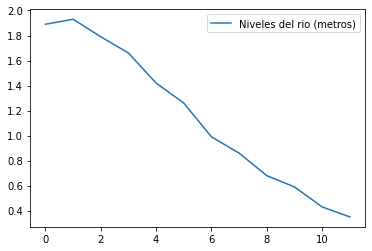

In [4]:
data.plot()

# Cookies: ¿Como descargar datos de sitios que requieren estar logueado?

Mientras el usuario navega por un sitio, se acumula información sobre su actividad como pequeños archivos o strings denominados _cookies_, que sirven, por ejemplo, para mantener una sesión iniciada.

Intentemos descargar las preguntas de [este](https://www.okcupid.com/profile/11244439767796291032/questions?filter_id=1) perfil ficticio de okcupid. Utilizaremos [Get cookies.txt
](https://chrome.google.com/webstore/detail/get-cookiestxt/bgaddhkoddajcdgocldbbfleckgcbcid) para guardar facilmente los datos de navegación (cookies) y luego utilizarlas en nuestros requests.

In [19]:
from requests import get

# Ejemplo sin cookies
get("https://www.okcupid.com/1/apitun/profile/11244439767796291032/answers").json()

{'error': {'type': 'OAuthError', 'message': 'required access_token missing'}}

In [18]:
from requests import get
from http.cookiejar import MozillaCookieJar

# Cargo el archivo que contiene los datos de navegación, en particular los que demuestran que nos logueamos en el sitio.
cookies_path = "okcupid.com_cookies.txt"
cookies = MozillaCookieJar(cookies_path)
cookies.load()

# Ejemplo con cookies
get("https://www.okcupid.com/1/apitun/profile/11244439767796291032/answers", cookies=cookies).json()

{'data': [{'target': {'importance': 5,
    'public': True,
    'id': 251223,
    'accepts': [0, 1, 2],
    'viewer_accepts': True,
    'note': None,
    'skipped': False,
    'date_answered': 'Today - 1:19pm',
    'timestamp_answered': 1634401166,
    'answer': 2},
   'viewer': {'target_accepts': True,
    'importance': 5,
    'public': True,
    'id': 251223,
    'accepts': [0, 1, 2],
    'note': None,
    'skipped': False,
    'date_answered': 'Today - 1:19pm',
    'timestamp_answered': 1634401166,
    'answer': 2},
   'question': {'genre': 'other',
    'text': 'Are you a bookworm?',
    'id': 251223,
    'answers': ['Yes', 'No', 'Somewhat'],
    'noskip': 0}},
  {'target': {'importance': 5,
    'public': True,
    'id': 2203088467,
    'accepts': [0, 1, 2, 3],
    'viewer_accepts': True,
    'note': None,
    'skipped': False,
    'date_answered': 'Tuesday - 7:54pm',
    'timestamp_answered': 1634079289,
    'answer': 2},
   'viewer': {'target_accepts': True,
    'importance': 5,
  

# Herramientas útiles
- [curl2python](https://curl.trillworks.com/)
- [Visualizador de JSONs](http://jsonviewer.stack.hu/)

# Recursos útiles
- [Tutorial de Indian Pythonista sobre APIs ocultas](https://www.youtube.com/watch?v=twuhocLtGCg)